## City of LA - Job postings should be an invitation, not a barrier

#### If you are having issues viewing the kernel due to size, just fork it and you'll be able to see it much clearer.


## One Hypothesis : 

### Adjusting the readability-level of job postings based on education requirements of that post will increase interest in job postings for those limited written English comprehension skills.

Upon initial analysis, the very first job text was at the 23rd and 24th grade level!!!!   A Painter.  I don't think that is reasonable to expect your average painter to be able to read at a post-doc level!

It's no suprise they might have trouble attracting talent

"The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to: (1) identify language that can negatively bias the pool of applicants; (2) improve the diversity and quality of the applicant pool; and/or (3) make it easier to determine which promotions are available to employees in each job class."

Breaking it down into:  (in all sort of orders in my notebooks as I work in different areas)
     - Prep
     - Explore
     - Goal 1 - create a single structured CSV file
     - Goal 2 - improve diversity and quality of applicant pool  (focus on readability)
     - Goal 3 - identify promotional opportunities  (req identification and promotion graphs)
                
### Consider upvoting if any of this is of interest or value to you. Thanks!

# Goal 1: Results
I don't have any yet for this based on the sample that was provided. I struggle with the usefulness of the layout as we don't have insight into the process that will consume it. The files I am creating are inputs to my analysis and recommendations for goals 2 and 3.
Towards the end of the kernel, I have started creating the submission csv...still much work to do. 

There are some discussion going on it here: https://www.kaggle.com/c/data-science-for-good-city-of-los-angeles/discussion/92339#latest-534057

# Goal 2 : Results and Recommendations
I'm reviewing some ideas as I go along. I AM seeing that some of the job codes that pop up as problematic are also on the list of positions that are challenging to fill - tree surgeon is an example.

1. grade level too high - Simplify
 -  too many high-syllable words
 -  too many words in a sentence
 
2. the content might be overly-formal, reducing readability and industry tends to label this as 'male' (judge that as you may)

3. the length of the postings is generally way too long and exceeds 700 word limit
    - Simplify or visually break up the description
    
4. the postings appear to be developed for the employer, not the prospects
    - How to get the legal verbage in while still attracting prospect?
    - Here is a great kernel by @koalaberarski on the use of pronouns:
            https://www.kaggle.com/koalabearski/how-la-uses-we-you-and-applicant-to-hire
    - Perhaps a redesign of the job posting creating a visual separations.
        Section 1: Woo the prospect with the advantages of that position and working for the City of LA. Includes job description.
                   What is the growth of this position? Why should they work for the City of LA and not somewhere else.
                   Once you've enticed them, then you can start scaring them off with a long list of requirements
        Visual Break
        Section 2: Requirements. What is a real 'requirement' and what is preferred?
                   Referencing the 'Employer Tip' in this report: 
                   https://business.linkedin.com/talent-solutions/blog/diversity/2019/how-women-find-jobs-gender-report
        Visual Break
        Section 3: Application Process. Make it organized so the prospect can see the exact order of the steps of the process.
                    OR - separate it completely. First get them interested and self-identify as qualified. 
                    Then send them to a page of simple step by step instructions in plain language.
                   

# Goal 3 : Results and Recommendations
Assuming an employee database that stores pertinant data point, it would be advisable to create a table that stores the unique features of each job position (possibly job postings). A compare is done and when a threshold is met, a trigger communication is sent to the current employee of the promotional opportunity. This can also be done for prospects if they enter information and ask to be informed of opportunities. I have extracted some key requirements features manually. I allow inputs to determine the graph viz. Try it out!
Once I have the details nailed and the csv created and if I have time, I will reverse engineer for automation. (note: not enought time)

#### Check out my spin-off kernel Fun with Graphs: https://www.kaggle.com/silverfoxdss/city-of-la-fun-with-job-graphs

Recommendations: 

     Standardize the degrees and coursework selections (such as a drop-down) so that they can be more easily mapped
     Standardize the education type into a dropdown so that four-year-degree and Bachelor's are synched up. 
         Some postings state four-year-college but not necessarily a degree. 
     Standardize the job titles across the different data sources
         Ideally, job titles should match in the requirements and across documents and job graphs
     Standardize the certification, license, and training course names across descriptions

# Explore - Getting Smart

#### White Paper: Gender, Genre, and Writing Style in Formal Written Texts 
    http://u.cs.biu.ac.il/~koppel/papers/male-female-text-final.pdf


#### What's a good readability score? 
    For grade levels, the result of most of the scoring algorithms, the score corresponds roughly to the number of years of education a person has had - based on the USA education system.
    A grade level of around 10-12 is roughly the reading level on completion of high school.
    Text to be read by the general public should aim for a grade level of around 8. Written by Steve Linney 

#### Readability calculations
    https://www.geeksforgeeks.org/readability-index-pythonnlp/
    
#### Comments on length - no more than 700 words
    https://www.mightyrecruiter.com/blog/6-appalling-job-postings-and-what-you-can-learn-from-them/
    
#### Diversity considerations
    https://www.fastcompany.com/3044094/how-changing-one-word-in-job-descriptions-can-lead-to-more-diverse-candid
    https://www.tmhra.org/ADAToolkit/5-WriteADA-JobDescrip.pdf
    https://slator.com/demand-drivers/linguistic-diversity-in-the-us-hits-record-high/

#### Packages to import.   Custom import required

 PyPDF2    https://pythonhosted.org/PyPDF2/PdfFileReader.html
 
 textstat https://pypi.org/project/textstat/

In [ ]:
# Apologies if some packages are imported down further in the notebook.
#...it's a work in progress and sometimes I forget to bring them back up.
# Also, if there is much code and many packages and I just want to reuse one sections, I have to remember which packages went with it.

%matplotlib inline



!pip install PyPDF2
!pip install textstat
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import re #search in strings.

import plotly.plotly as py
import cufflinks as cf

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from wordcloud import WordCloud
import textstat

pd.set_option('max_colwidth', 10000)  # this is important because the requirements are sooooo long 

import warnings
warnings.filterwarnings('ignore')   # get rid of the matplotlib warnings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandasql                    # https://github.com/yhat/pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Prep : Load file titles

In [ ]:
input_dir = '../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins/'

def getListOfFiles(dirName):
# create a list of file and sub directories 
# names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
    # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles
listOfFiles = getListOfFiles(input_dir)
df_bulletins = pd.DataFrame(listOfFiles, columns = ['job_position'])
df_bulletins.head(2)

### Prep : Clean up the file names

In [ ]:
# Clean up of the job_position name
df_positions = pd.DataFrame()
df_positions['job_position'] = (df_bulletins['job_position']
                                .str.replace(input_dir, '', regex=False)
                                .str.replace('.txt', '', regex=False)
                                .str.replace('\d+', '')
                                .str.replace(r"\s+\(.*\)","")
                                .str.replace(r"REV",""))

#Remove the numbers
df_positions['class_code'] = (df_bulletins['job_position']
                              .str.replace(input_dir, '', regex=False)
                              .str.replace('.txt', '', regex=False)
                              .str.extract('(\d+)'))

display(df_positions.head(2))
# Add the Text fields of Salary, Duties and Minimum REQ


### Prep : Convert the information in the txt files in a table


In [ ]:
#Convert the txt files to a table:
import glob
path = input_dir # use your path
all_files = glob.glob(path + "/*.txt")
li = []

for filename in all_files:
    with open (filename, "r",errors='replace') as myfile:
        data=pd.DataFrame(myfile.readlines())
        #df = pd.read_csv(filename, header=0,error_bad_lines=False, encoding='latin-1')
    li.append(data)
frame = pd.concat(li, axis=1, ignore_index=True)
#pd.read_csv(listOfFiles,header = None)
frame = frame.replace('\n','', regex=True)


In [ ]:
frame.head(10)

Prep : Look for keywords, and append the following strings to the final dataframe

In [ ]:
# Here the loop should start, for each text file do:
def getString(col_i, frame):
    try:
        filter = frame[col_i] != ""
        bulletin = frame[col_i][filter]
       
        isal = min(bulletin[bulletin.str.contains('SALARY',na=False)].index.values) #take the sum to convert the array to an int...TO CHANGE
        inot = max(bulletin[bulletin.str.contains('NOTES:',na=False)].index.values) # NOTES
        iexm = max(bulletin[bulletin.str.contains('THIS EXAMINATION',na=False)].index.values) # EXAMS
        idut = min(bulletin[bulletin.str.contains('DUTIES',na=False)].index.values) # DUTIES
        ireq = min(bulletin[bulletin.str.contains('REQUIREMENT',na=False)].index.values) #REQUIREMENTS
        ipro = min(bulletin[bulletin.str.contains('PROCESS',na=False)].index.values) # PROCESS NOTES
        icode = min(bulletin[bulletin.str.contains('Class Code',na=False)].index.values)
        iend = max(bulletin[bulletin.str.contains('discriminate',na=False)].index.values)
        
        class_code = sum(bulletin.str.extract('(\d+)').iloc[icode].dropna().astype('int'))
        
        salary       = (bulletin.loc[isal+1:idut-1]).to_string()
        duties       = (bulletin.loc[idut+1:ireq-1]).to_string()
        requirements = (bulletin.loc[ireq+1:ipro-1]).to_string()
        exam         = (bulletin.loc[iexm+1:iend-1]).to_string()
        process      = (bulletin.loc[ipro+1:inot-1]).to_string()
        notes        = (bulletin.loc[inot+1:iexm-1]).to_string()
        return (class_code, salary, duties, requirements,exam,process, notes)
    except:
        return (np.nan,np.nan,np.nan,np.nan, np.nan, np.nan, np.nan)
    
jobsections = pd.DataFrame()
#getString(0,bulletin)
for col_i in range(frame.shape[1]):
    #print(col_i)
    #print(list(getString(col_i,frame)))
    prop = getString(col_i,frame)
    prop = pd.DataFrame(list(prop)).T
    jobsections = jobsections.append(prop)

In [ ]:
jobsections.head(2)

In [ ]:
jobsections.columns = ['class_code','salary','duties','requirements', 'exam', 'process', 'notes']
jobsections['class_code'] = pd.to_numeric(jobsections['class_code'],downcast='integer')
df_positions['class_code'] = pd.to_numeric(df_positions['class_code'], downcast='integer')
#df_positions['class_code']
df_jobs = df_positions.merge(jobsections, left_on='class_code',right_on='class_code', how='outer')
display(df_jobs.dropna())

In [ ]:
pd.set_option('max_colwidth', 10000)

jobsections['requirements'].head(1)

## Explore - Duties Wordcloud

In [ ]:
# Read the whole text.
text = df_jobs['duties'].values

text = str(text)


# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Explore - PDFs
Let's take a look


In [ ]:
import PyPDF2   #https://pythonhosted.org/PyPDF2/PdfFileReader.html

# Get the pdf files.
input_dir = '../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Additional data/PDFs/'

listOfFiles = getListOfFiles(input_dir)
listOfFiles[0:10]
# commenting out for now as it outputs a large amount of data and this seems to disrupt the viewing of the kernel. 


In [ ]:
df_opening_pdfs = pd.DataFrame(listOfFiles, columns = ['opening_pdf'])

# Clean up the pdf opening names

df_openings = pd.DataFrame()
df_openings['job_position'] = (df_opening_pdfs['opening_pdf']
                                .str.replace(input_dir, '', regex=False)
                                .str.replace('.txt', '', regex=False)
                                .str.replace('\d+', '')
                                .str.replace(r"\s+\(.*\)","")
                                .str.replace(r"REV",""))

#Remove the numbers
df_openings['class_code'] = (df_opening_pdfs['opening_pdf']
                              .str.replace(input_dir, '', regex=False)
                              .str.replace('.txt', '', regex=False)
                              .str.extract('(\d+)'))


df_openings['version'] =       df_opening_pdfs['opening_pdf'].str.slice(start=-10,stop=-4)


pdfFile = PyPDF2.PdfFileReader('../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Additional data/PDFs/2018/December/Dec 7/SENIOR PERSONNEL ANALYST 9167 120718.pdf', 'rb')
#pdfFile = df_opening_pdfs['opening_pdf']
metadata = pdfFile.getDocumentInfo()
metadata
#pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
#df_openings['info'] = pdfReader.getPage(1) 
                           
df_openings.head(2)
# Add the Text fields of Salary, Duties and Minimum REQ


#pdfFileObj = open('../input/CityofLA/CityofLA/Additional_data/PDFs/2018/February/Feb_2/SOLID_WASTE_DISPOSAL_SUPERINTENDENT_4108_020218.pdf','rb') #'rb' for read binary mode 
#pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
#pdfReader.numPages.pageObj = pdfReader.getPage(1) #'1' is the page number pageObj.extractText()

## Explore - What is the structure of the PDF?

In [ ]:
pdfFile = PyPDF2.PdfFileReader('../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Additional data/PDFs/2018/December/Dec 7/SENIOR PERSONNEL ANALYST 9167 120718.pdf', 'rb')
#pdfFile = df_opening_pdfs['opening_pdf']
DocumentInfo = pdfFile.getDocumentInfo()
DocumentInfo
# commenting out for now as it outputs a large amount of data and this seems to disrupt the viewing of the kernel. 

In [ ]:
pdfFields = pdfFile.getNumPages()
pdfFields
# commenting out for now as it outputs a large amount of data and this seems to disrupt the viewing of the kernel. 

In [ ]:
pdfPageLayout = pdfFile.getPageLayout()
pdfPageLayout
# commenting out for now as it outputs a large amount of data and this seems to disrupt the viewing of the kernel. 

In [ ]:
pdfPageMode = pdfFile.getOutlines()
pdfPageMode
# commenting out for now as it outputs a large amount of data and this seems to disrupt the viewing of the kernel. 

In [ ]:
pdfFile.numPages 
pageObj = pdfFile.getPage(1)
pdftext= pageObj.extractText()

pdftext
# commenting out for now as it outputs a large amount of data and this seems to disrupt the viewing of the kernel. 

# Goal 2 - Text Reading Levels

https://www.geeksforgeeks.org/readability-index-pythonnlp/

To apply the formula:

Select several 100-word samples throughout the text.
Compute the average sentence length in words (divide the number of words by the number of sentences).
Compute the percentage of words NOT on the Dale–Chall word list of 3, 000 easy words.
Compute this equation

 Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365
Here,
PDW = Percentage of difficult words not on the Dale–Chall word list.
ASL = Average sentence length
The Gunning fog Formula

Grade level= 0.4 * ( (average sentence length) + (percentage of Hard Words) )
Here, Hard Words = words with more than two syllables.
Smog Formula

SMOG grading = 3 + √(polysyllable count).
Here, polysyllable count = number of words of more than two syllables in a 
sample of 30 sentences.
Flesch Formula

Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
Here,
ASL = average sentence length (number of words divided by number of sentences)
ASW = average word length in syllables (number of syllables divided by number of words)
Advantages of Readability Formulae:

1. Readability formulas measure the grade-level readers must have to be to read a given text. Thus provides the writer of the text with much needed information to reach his target audience.

2. Know Before hand if the target audience can understand your content.

3. Easy-to-use.

4. A readable text attracts more audience.

Disadvantages of Readability Formulae:

1. Due to many readability formulas, there is an increasing chance of getting wide variations in results of a same text.

2. Applies Mathematics to Literature which isn’t always a good idea.

3. Cannot measure the complexity of a word or phrase to pinpoint where you need to correct it.

In [ ]:
#import textstat

# 2018/December/Dec 7/SENIOR PERSONNEL ANALYST 9167 

test_data = (
    "The examination will consist of a qualifying multiple"
    "-choice test, an advisory essay, an advisory oral presentation, and an interview."
    " The qualifying written test will consist of "
    "multiple-choice questions in which emphasis may be placed on the candidate's expertise and knowledge of:"
    " Civil Service selection procedures; Equal Employment Opportunity "
    "(EEO) policies; Americans with Disabilities Act (ADA) regulations; Family and Medical Leave Act (FMLA); "
    "Fair Labor Standards Act (FLSA); and demonstrated proficiency and "
    "familiarity with the City's authoritative documents sufficient to identify the appropriate source, "
    "interpret complex written material, and effectively interpret provisions of the City Charter, "
    "Administrative Code, City Code of Ethics, Memoranda of Understandin (MOUs) provisions,"
    " Mayor's Executive Directives, and Personnel Department rules, policies and procedures, "
    "including Civil Service Commission (CSC) Rules, Personnel Department Policies and Personnel Department Procedures Manual; "
    "interpret complex data such as legislation, technical reports, and graphs; principles and practices of supervision,"
    " including training, counseling, and disciplining subordinate staff; and other necessary knowledge, skills, and abilities."
    "Prior to the multiple-choice test, applicants will be required to prepare some written material related to the work "
    "of a Senior Personnel Analyst employed by the City of Los Angeles. "
    "This essay material will not be separately scored, but will be presented to the interview board "
    "for discussion with the candidate and for consideration in the overall evaluation of the candidate's qualifications."
    "The advisory essay will be administered on-line. Candidates will receive an e-mail from the City of Los Angeles "
    "outlining the specific steps needed to complete the on-line advisory essay. "
    "Candidates will be required to complete the on-line advisory essay between FRIDAY, JANUARY 11, 2019 and "
    "SUNDAY, JANUARY 13, 2019. Additional instructions will be sent via e-mail. "
    "Candidates who fail to complete the advisory essay as instructed may be disqualified."
    "The multiple-choice test will be proctored and administered on-line during a single session. "
    "Candidates invited to participate in the on-line multiple-choice test will be able to take the test "
    "as instructed from a remote location using a computer with a webcam and a reliable internet connection. "
    "Candidates will receive an e-mail from the City of Los Angeles outlining the dates and "
    "specific steps on how to take the multiple-choice test and advisory essay on-line"
)

print ('Flesch reading ease ' + str(textstat.flesch_reading_ease(test_data)))
print ('smog index ' + str(textstat.smog_index(test_data)))
print ('Flesch Kincaid ' + str(textstat.flesch_kincaid_grade(test_data)))
print ('Coleman Liau indextex ' + str(textstat.coleman_liau_index(test_data)))
print ('Automated readability index ' + str(textstat.automated_readability_index(test_data)))
print ('Dale Chall readability score ' + str(textstat.dale_chall_readability_score(test_data)))
print ('Difficult Words ' + str(textstat.difficult_words(test_data)))
print ('Linsear Write Formula ' +str(textstat.linsear_write_formula(test_data)))
textstat.gunning_fog(test_data)
textstat.text_standard(test_data)

In [ ]:
# Let's take another sample


df_opening_pdfs.head(2)

# Clean up the pdf opening names

df_openings = pd.DataFrame()
df_openings['job_position'] = (df_opening_pdfs['opening_pdf']
                                .str.replace(input_dir, '', regex=False)
                                .str.replace('.txt', '', regex=False)
                                .str.replace('\d+', '')
                                .str.replace(r"\s+\(.*\)","")
                                .str.replace(r"REV",""))

#Remove the numbers
df_openings['class_code'] = (df_opening_pdfs['opening_pdf']
                              .str.replace(input_dir, '', regex=False)
                              .str.replace('.txt', '', regex=False)
                              .str.extract('(\d+)'))


df_openings['version'] =       df_opening_pdfs['opening_pdf'].str.slice(start=-10,stop=-4)

pdfFile = PyPDF2.PdfFileReader('../input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Additional data/PDFs/2018/September/Sept 21/PAINTER 3423 092118.pdf', 'rb')
#pdfFile = df_opening_pdfs['opening_pdf']
metadata = pdfFile.getDocumentInfo()
metadata
#pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
#df_openings['info'] = pdfReader.getPage(1) 
                           
df_openings.head()

In [ ]:
pdfFile.numPages 
pageObj = pdfFile.getPage(1)
pdftext= pageObj.extractText()

pdftext

In [ ]:
# A painter!!!


def replace(value):
  return re.sub(r'\n', r'', value)

pdftext_clean = replace(pdftext)
pdftext_clean
                                
print ('Flesch Reading Ease ' + str(textstat.flesch_reading_ease(pdftext_clean)))
print ('Smog Index ' + str(textstat.smog_index(pdftext_clean)))
print ('Flesch Kincaide grade ' + str(textstat.flesch_kincaid_grade(pdftext_clean)))
print ('Coleman Liau Index ' + str(textstat.coleman_liau_index(pdftext_clean)))
print ('Automated Readability Index ' + str(textstat.automated_readability_index(pdftext_clean)))
print ('Dale Chall Readability Score ' + str(textstat.dale_chall_readability_score(pdftext_clean)))
print ('Difficult Words ' + str(textstat.difficult_words(pdftext_clean)))
print ('Linsear Write Formula '+  str(textstat.linsear_write_formula(pdftext_clean)))
print ('Gunning Fog ' + str(textstat.gunning_fog(pdftext_clean)))
print('Text Standard ' + str(textstat.text_standard(pdftext_clean)))

In [ ]:
pdftext_clean

In [ ]:
basic = "SELECTION PROCESS  The examination will consist entirely of a weighted multiple-choice test administered and proctored on-line. In the on-line multiple-choice test, the following competencies may be evaluated: Mathematics, Teamwork, Equipment Operation, including the operation of hydraulic equipment, such as paint sprayers, scissor lift, and boom lift used to apply paint to surfaces at elevated heights; Safety Focus, including: safety procedures, regulations, and restrictions as required by the California Occupational Safety and Health Administration, South Coast Air Quality Management District, Environmental Protection Act, and California Department of Toxic Substances Control, including procedures necessary when using paints and coatings containing volatile organic compounds, handling and disposing of hazardous or toxic wastes, and working near energized electrical equipment or with toxic and flammable materials; safety procedures and personal protective equipment required when preparing surfaces and applying paint; safety requirements that must be adhered to when using stepladders, extension ladders, and scaffolds; safety procedures required when using high pressure equipment for the preparation of surfaces and application of paint; equipment used to ventilate an area during and/or after painting; and Job Knowledge, including knowledge of: protective and decorative coverings, and the procedures used to mix and apply them; methods, tools, and materials used to prepare a wide variety of surfaces for painting; methods, tools, and equipment used to apply paint or protective coatings to a wide variety of surfaces; other necessary skills, knowledge, and abilities.   Additional information can be obtained by going to http://per.lacity.org/index.cfm?content=jobanalyses and clicking on Competencies under Painter. "

In [ ]:
# Painter   54th and 55th grade???  Good grief

pdftext_clean = basic                
print ('Flesch Reading Ease ' + str(textstat.flesch_reading_ease(pdftext_clean)))
print ('Smog Index ' + str(textstat.smog_index(pdftext_clean)))
print ('Flesch Kincaide grade ' + str(textstat.flesch_kincaid_grade(pdftext_clean)))
print ('Coleman Liau Index ' + str(textstat.coleman_liau_index(pdftext_clean)))
print ('Automated Readability Index ' + str(textstat.automated_readability_index(pdftext_clean)))
print ('Dale Chall Readability Score ' + str(textstat.dale_chall_readability_score(pdftext_clean)))
print ('Difficult Words ' + str(textstat.difficult_words(pdftext_clean)))
print ('Linsear Write Formula '+  str(textstat.linsear_write_formula(pdftext_clean)))
print ('Gunning Fog ' + str(textstat.gunning_fog(pdftext_clean)))
print('Text Standard ' + str(textstat.text_standard(pdftext_clean)))

# Goal 2 - Readability Metrics

## I ran the Painter text through readable.com to get some industry measurement standards.

Interesting to see that syllables, length of words, and length of sentence are key drivers of the scoring. I think I can work with those.

Note:  I have all of the reports from the jobs I ran available
https://www.kaggle.com/silverfoxdss/painteranalysis

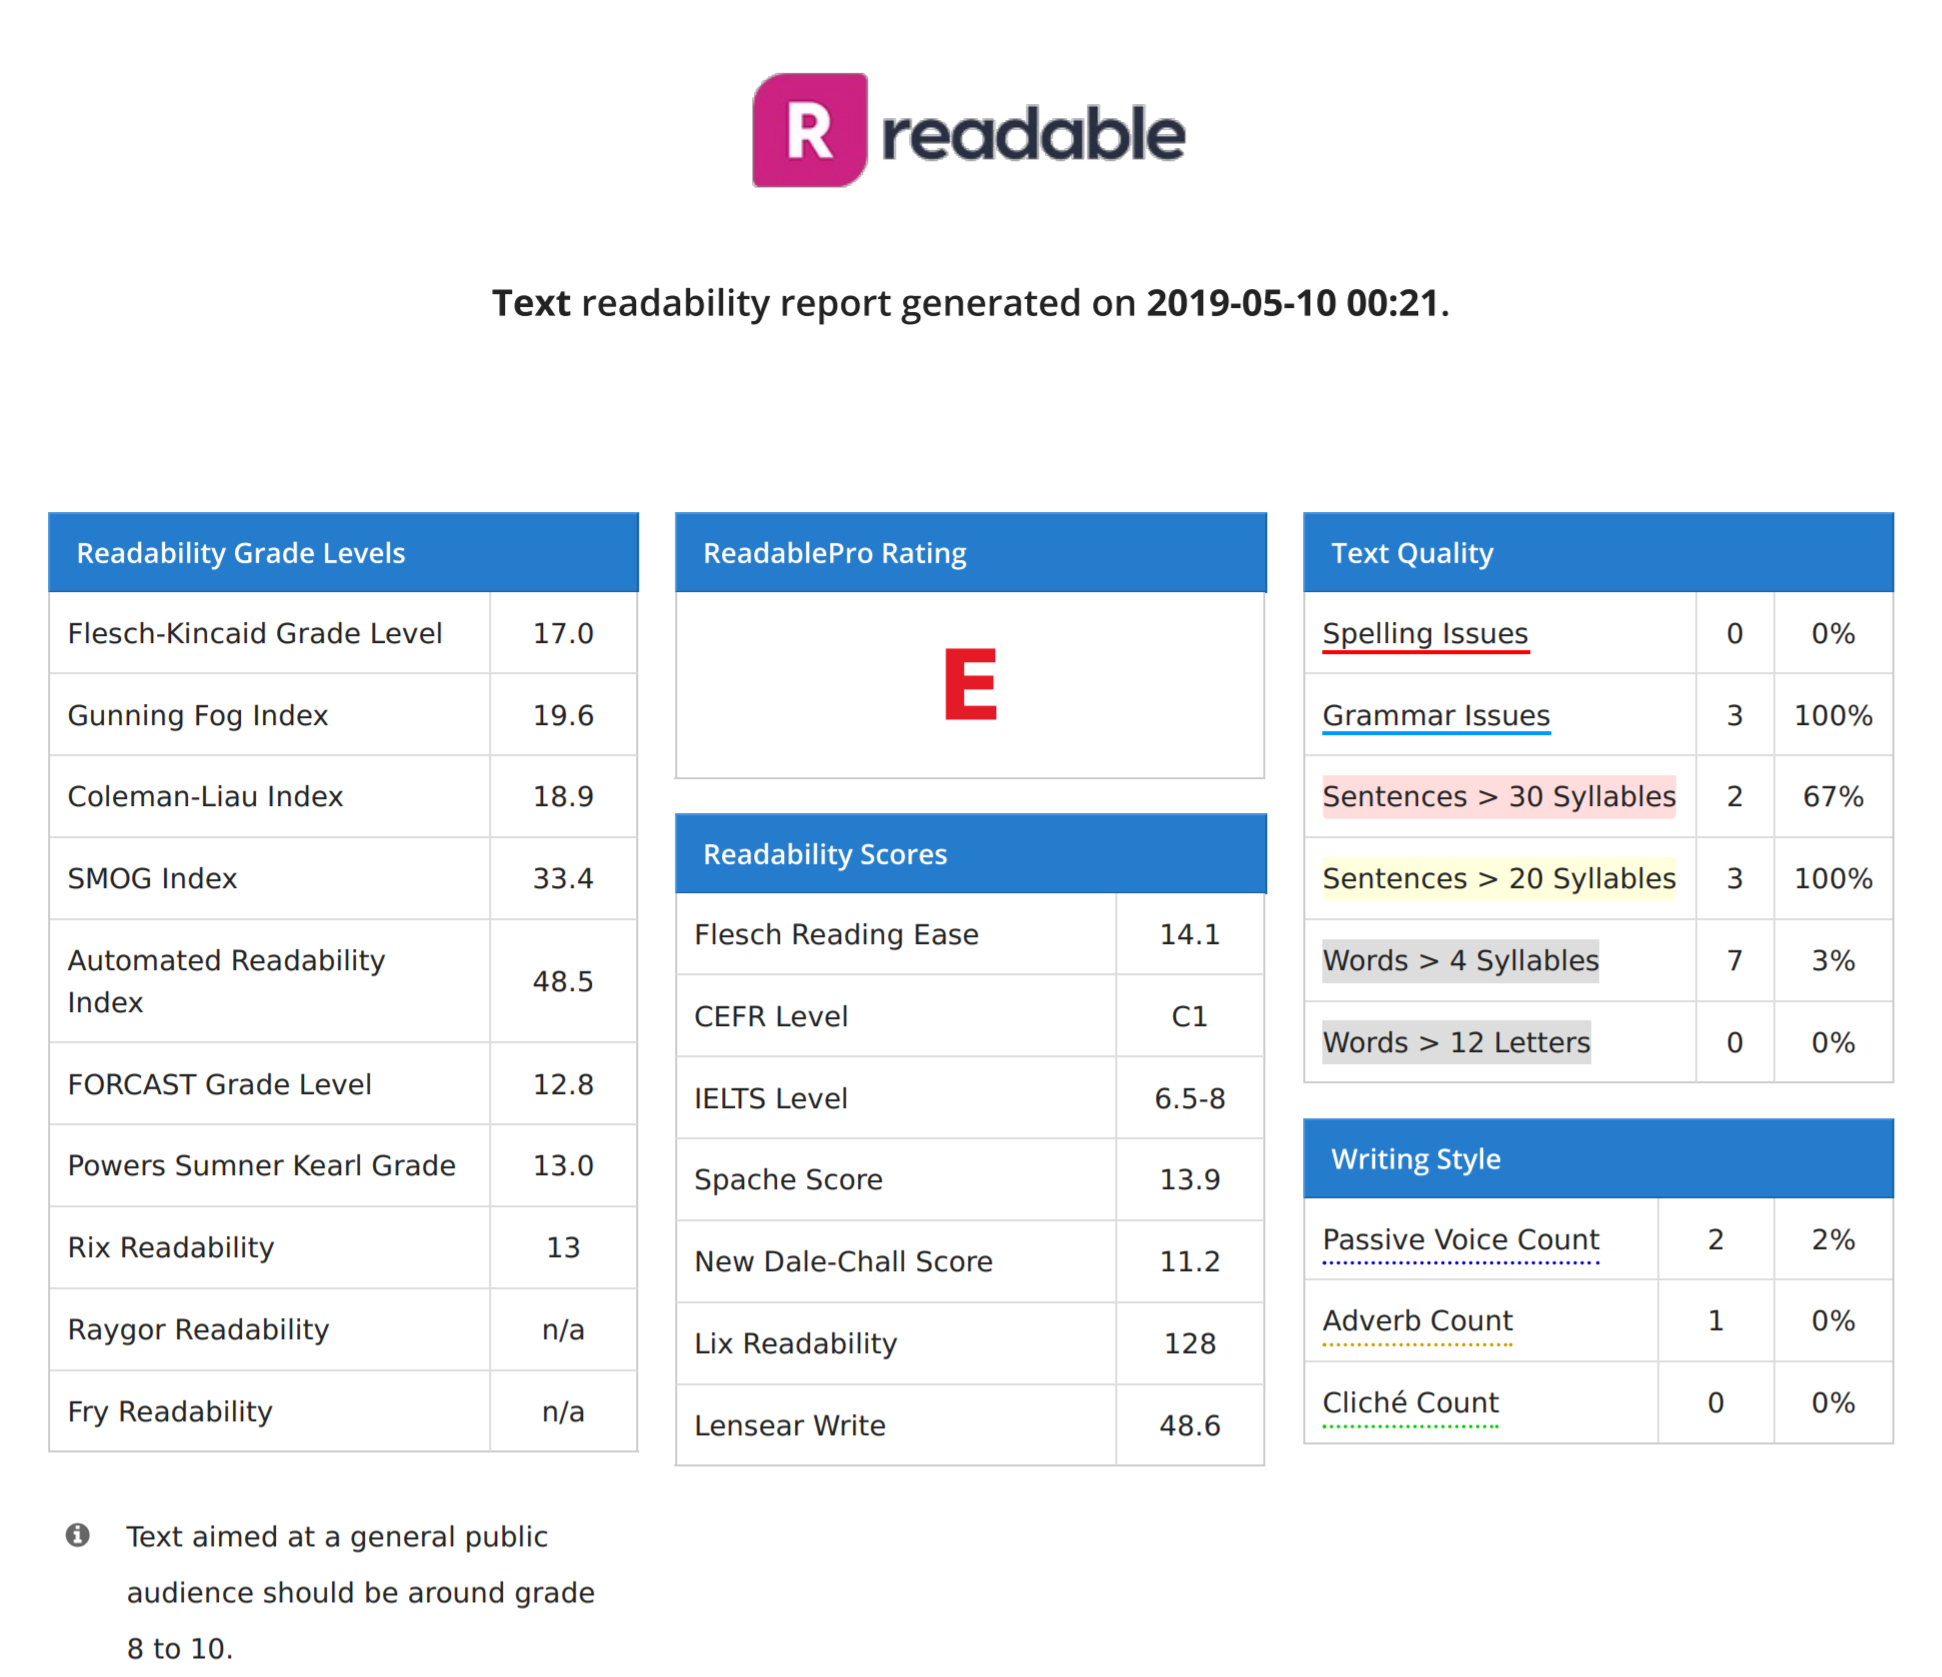

# Goal 2 - Bring in the generated scores and take a look

I generated the readability scores using Readable.com during a 24-hour free demo period. I did not have enough time to process all text and pdf's, but I got a good representation. I dowloaded each output for each file that I processed and merged into a single csv.

This csv has been published here on Kaggle and is available for your use:  

https://www.kaggle.com/silverfoxdss/city-of-la-readbility-scores

In [ ]:
scores = pd.read_csv('../input/city-of-la-readbility-scores/reading_level_samples_combined.csv', header=0)
scores.head(20)

# Goal 2: Words too long

Shorten your words : https://medium.com/@bloghands/tips-and-tools-for-improving-your-content-readability-score-eed82e2ffa87
With a little thought, you will normally be able to exchange a long word for a short word or words.

Words like ‘proximity’ become ‘near.’ ‘Furthermore’ may become ‘also.’

In [ ]:
# Longest words
longwords = scores['Longest Word Letters Words'].values

text = str(longwords)
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
# Words with 7 letters

sns.distplot(scores['Words With Seven Letters'], kde=False, rug=True)


print(' Median Words With Seven Letters ' + str(scores['Words With Seven Letters'].median(axis=0)))
print(' Mean Words With Seven Letters ' + str(scores['Words With Seven Letters'].mean(axis=0)))
#print('Mode Word Count ' + str(scores['Word Count'].mode))
print('Percentiles')
scores['Words With Seven Letters'].describe(percentiles = [.10,.20,.3,.4,.5,.6,.7,.8,.9,.95,.97,1])
print('Standard Deviations')
scores['Words With Seven Letters'].std(axis=0)
plt.show()

In [ ]:
# Which job codes are in the 95% percentile and above
scores.rename(columns={'Words With Seven Letters': 'Words_With_Seven_Letters'}, inplace=True)
bigwordsq = """
select distinct item, Words_With_Seven_Letters
from scores
where Words_With_Seven_Letters > 700
order by Words_With_Seven_Letters desc"""
bigwords = pysqldf(bigwordsq)
print(bigwords)

# If you look closely, you will see many of these job titles fall on the list of hard-to-fill positions.

In [ ]:
scores.columns

# Goal 2 - Too Many Syllables

Too many Syllables

Words that seem common: Identification, Responsibilities

Words that probably are problematic: Interdepartmental, reconciliation (unless it's an accounting or auditing position)

Use fewer syllables : https://medium.com/@bloghands/tips-and-tools-for-improving-your-content-readability-score-eed82e2ffa87
Use one- and two-syllable words when you can. Avoid using longer words unless they are widely used and familiar.


In [ ]:
# Read the whole text.
longsyll = scores['Longest Word Syllables Words'].values

text = str(longsyll)
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=120, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Which of the following high syllable words might be candidates for improvement?
# periodically
# reconciliation
# availability
# identification
# electronically
# responsibilities
# interdepartmental
# specifications
# opportunities

In [ ]:
# Total Syllable Count
sns.distplot(scores['Syllable Count'], kde=False, rug=True);

print('Syllable Count ' + str(scores['Syllable Count'].median(axis=0)))
#print('Mode Word Count ' + str(scores['Word Count'].mode))
print('Percentiles')
scores['Syllable Count'].describe(percentiles = [.10,.20,.3,.4,.5,.6,.7,.8,.9,.95,.97,1])
print('Standard Deviations')
scores['Syllable Count'].std(axis=0)

In [ ]:
# Which job codes are in the 80% percentile and above
scores.rename(columns={'Syllable Count': 'Total_Syllable_Count'}, inplace=True)
totalsyllsq = """
select distinct item, Total_Syllable_Count
from scores
where Total_Syllable_Count > 3000
order by Total_Syllable_Count desc"""
totalsylls = pysqldf(totalsyllsq)
print(totalsylls)
plt.show()
# based on the AMA reponse of which positions prove most challenging, we see that some have very high total syllable counts
# I'm not even displaying all available rows - I recommend printing to CSV and reviewing the total list

# Accountant
# Accounting Clerk
# Applications Programmer
# Assistant Street Lighting Electrician   <-- 3040
# Building Mechanical Inspector
# Detention Officer
# Electrical Mechanic                           
# Equipment Mechanic                             
# Field Engineering Aide
# Housing Inspector
# Housing Investigator
# Librarian                                      <-- Librarian 4163
# Security Officer
# Senior Administrative Clerk
# Senior Custodian
# Senior Equipment Mechanic
# Tree Surgeon                                   <-- 5856
# In the future, our Personnel Department expects to find it challenging to fill the following classes:

# IT-related classes (e.g., Applications Programmer)   <-- systems analyst 16382, DBA 4810, systems programmer 4217, IS Manager 3006
# Wastewater classes                                   
# Inspector classes                                    
# Journey-level classes

# Goal 2- Too many words

700+ being too many

The very fact that scale of my distribution plot goes over 8000 is not good.

Shorten your sentences - https://medium.com/@bloghands/tips-and-tools-for-improving-your-content-readability-score-eed82e2ffa87
Let’s say your readability analyzer says your work is too complicated. You can make significant improvements by shortening the longest sentences. If you have a long sentence, try to create two. A helpful rule is: “One idea, one sentence.”

In [ ]:
sns.distplot(scores['Word Count'], kde=False, rug=True);

In [ ]:
print('Mean Word Count ' + str(scores['Word Count'].mean(axis=0)))
print('Median Word Count ' + str(scores['Word Count'].median(axis=0)))
#print('Mode Word Count ' + str(scores['Word Count'].mode))
print('Percentiles')
scores['Word Count'].describe(percentiles = [.10,.20,.3,.4,.5,.6,.7,.8,.9,.95,.97,1])
print('Standard Deviations')
scores['Word Count'].std(axis=0)
# The median and mean word count are pretty aligned, but there are some outliers


In [ ]:
# Which job codes are in the 97% percentile and above
scores.rename(columns={'Word Count': 'Word_Count'}, inplace=True)
toomanywordsq = """
select distinct item, Word_Count
from scores
where Word_Count > 2100
order by Word_Count desc"""
toomanywords = pysqldf(toomanywordsq)
toomanywords

# based on the AMA reponse of which positions prove most challenging, we see that some have very high word counts
# Accountant
# Accounting Clerk
# Applications Programmer
# Assistant Street Lighting Electrician
# Building Mechanical Inspector
# Detention Officer
# Electrical Mechanic                            <-- Electric Distribution Mechanic 2625
# Equipment Mechanic                             <-- heavy duty equipment mechanic 2114
# Field Engineering Aide
# Housing Inspector
# Housing Investigator
# Librarian                                      <-- Librarian 2141
# Security Officer
# Senior Administrative Clerk
# Senior Custodian
# Senior Equipment Mechanic
# Tree Surgeon                                   <-- 3437
# In the future, our Personnel Department expects to find it challenging to fill the following classes:

# IT-related classes (e.g., Applications Programmer)   <-- systems analyst 9019, DBA 2429, systems programmer 2220
# Wastewater classes                                   <-- underground distribution constuction mechanic 2780
# Inspector classes                                    <-- environmental 2134
# Journey-level classes

# Goal 2 - Gender numbers affect ratings

gender numbers that are lower - or at least on this scale, most likely in the middle, rate higher.

In [ ]:
# Gender (runs on a scale Female 0 to Male 100). There is documentation that it is noted that there is an inherent issue with this scale.

ax = sns.swarmplot(x="Gender Number", y="Rating", data=scores, order='A,B,C,D,E')

### Goal 2 - Time to figure out how to join the document dataframe to the readability dataframe

In [ ]:
scores.head(2)

In [ ]:
# I believe I will have to try to join the job name with the file name
# I need to create a new column on the scores , job_title
# I will need to clean up the Item column
        # Remove underscores
        # Only bring in the words, or the first n spaces          Yes, this code would be better structured for reuse....

scores['job_title'] = (scores['Item']
                                .str.replace('.txt', '', regex=False)
                                .str.replace('.pdf', '', regex=False)
                                .str.replace('_', ' ', regex=False)
                                .str.replace('\d+', '')
                                .str.replace(r"\s+\(.*\)","")
                                .str.replace(r"REV","")
                                .str.upper() )

scores['class_code'] = (scores['Item']
                              .str.replace(input_dir, '', regex=False)
                              .str.replace('.txt', '', regex=False)
                              .str.extract('(\d+)'))
scores.head(10)

# class code isn't perfect...
# combination of all caps, applying  .str.upper() 

In [ ]:
# if you've seen my other kernels, you'll know I like pandasql. 
# It's not as efficient at joining tables, but I find it more readable (no pun intended!)

import pandasql                    # https://github.com/yhat/pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

joined = """
select 
a.job_position as job_position1,a.class_code as class_code1, b.item as item2, b.job_title as job_title2, b.class_code as class_code2, a.notes
from df_jobs a
left outer join scores b
on a.job_position = b.job_title
"""

# setting up the left outer join to list all of the text and pdfs with score to the list of job titles we created earlier
joined2 = """
select a.*, b.*
from df_jobs b
left outer join scores a
on b.job_position = a.job_title
"""
df_joined2x = pysqldf(joined2)
print(df_joined2x)
# downloading to take a good look
df_joined2x.to_csv('descriptions_and_readability_scores.csv')



# Goal 3 - Requirements

 This is definitely going to be a wander (in circles, for sure)

 The goal (I believe):
 
     Given an employee's current state
             a. current job title/code
             b. length of time in current position
             c. highest level of education
             d. apprentice stints
             e. age
             
                  Identify current or upcoming promotional activities
                  
     Assumption: Ignore lateral moves

In [ ]:
what = """

SELECT substr(requirements, 1, pos-1) AS req_num1,
       substr(requirements, pos+1) AS req_desc1,
       substr(requirements, pos+2) AS req_num2,
       substr(requirements, pos+3) AS req_desc2
FROM
  (SELECT *,
          instr(requirements,'.') AS pos
   FROM df_jobs)

"""

df_whatx = pysqldf(what)
df_whatx.head(10)

# 1. = 453
# 2. = 449
# 3. = 236
# 4. = 124
# 5. = 69
# 6. = 34
# 7. = 22
# 8. = 10
# 9. = 6
# first byte is not a number, blank, or '.' 2
# second byte not a number 109
# third = 2
# fourth = 2  fifth = 2 6th = 2 7th = 259
# annoying, need to strip the spaces off the front  trim()

In [ ]:
df_jobs1 = df_jobs
df_jobs1['requirements'] = df_jobs1['requirements'].astype('str')
x = pd.DataFrame(df_jobs1['requirements'].str.split().values.tolist())
#x = pd.DataFrame(df_jobs1.requirements.str.split('.', expand=True).values,
#             columns=['Req1', 'Req2'])
#df_jobs1[['Req1','Req2']] = df_jobs1.requirements.str.split("1.",expand=True,)
x.head(2)

# this is garbage output but I'll leave it here to show what this code results in.

In [ ]:
# Warning - will run loooong
#tryit_df = df_jobs.head(10)
tryit = """
with separators as ( values ('1.'), ('2.'), ('3.'), ('4.') ),
  source (s) as ( select requirements from tryit_df ),
  bag (q) as ( -- POSITIONS OF ALL SEPARATORS
    with dim (len) as ( select length(s) from source ),
    ndx (n) as (
      select 1 union all select n+1 from ndx, dim where n < len
    ) select 0 --> PSEUDO SEPARATOR IN FRONT OF SOURCE STRING
      union all select n from ndx, source where substr(s, n, 1) in separators
      union all select len+1 from dim --> PSEUDO SEPARATOR AT BOTTOM
  ),
  pre (p) as ( -- POSITIONS OF SEPARATORS PRECEDING NON SEPARATORS
    select q from bag where not q+1 in bag
  ) select printf("%2d %2d <%s>", p, z, substr(s, p+1, z-p-1)) from (
      select p, (select min(q) from bag where q > p) as z from pre where z
    ), source
    limit 30;
"""

#tryitx = pysqldf(tryit)
#tryitx.head()

#pandasql - again, not the most efficient....
# I tried to Commit entire set but got : PandaSQLException: (sqlite3.OperationalError) database or disk is full
# I am interested to see how this technique works so I will try it on a single row.

In [ ]:
# Goal 3 - What are the most common requirements words to start looking at?
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

#reqwords = df_jobs['requirements'].values
reqwords = ' '.join(df_jobs['requirements'].str.lower())
text = str(reqwords)
stopwords = ['apply', 'nan', '1.', '2.', '3.', '4.', '5', '6', '7.', 'a.', 'b.', 'c.', 'd.','st...', 'a...',
             '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
              '23', '24', '25', '26', '27','28','29','30','31', '32', '33', '34', '35', '36', '37', 
               '38', '39', '50', 'one', 'two', 'three', 'four', 'five', 'six','seven','eight','nine','ten',
            'eleven', 'twelve', 'must', 'may', 'notes:','...', 't...']  + list(STOPWORDS)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400).generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

# looks like they want full time paid service of a specific time period!

In [ ]:
filtered_words = [word for word in reqwords.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(40):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the requirements')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# rainbow for inclusion lol

#### Goal #3 - Considering what we want to trigger a behavior nudge for a current employee to apply for a promotion

Time in prereq position met, 
Age?, 
New degree or certification

Pretend that we have a file of current employee status similar to such: (for simplicity, just their current job counts) :
Employee ID,  Current Job Code,  Current Job Full-time Months in Service,  Current Job Part-time Months in Service, Paid Position Flag, 
Accredited PhD Major, Accredited Masters Major, Accredited Bachelors Major, Accredited Associates Major, High School/GED Completed, Some College Completed, Certification1, Certification2, Certification3, Certification4, Certification5, Drivers License Flag, CDL Flag 


In [ ]:
degreesq = """
select
distinct
class_code,
case when requirements like '%full-time%' or requirements like '%Full-time%' 
        or requirements like '%full time%' or requirements like '%Full time%'
    then 1 else 0 end as full_time
,case when requirements like '%part-time%' or requirements like '%Part-time%' 
        or requirements like '%part time%' or requirements like '%Part time%'
    then 1 else 0 end as part_time
,case when requirements like '%month%' or requirements like '%year%' then 1 else 0 end as time_in_job_required
,case when requirements like '%Degree%' or requirements like '%degree%' then 1 else 0 end as degree_required
,case when requirements like '%Cert%' or requirements like '%cert%' then 1 else 0 end as certification_required
,case when requirements like '%Graduat%' or requirements like '%graduat%' then 1 else 0 end as graduation_required
,case when requirements like '%apprentic%' or requirements like '%Apprentic%' then 1 else 0 end as apprenticeship_required
,case when requirements like '%license%' or requirements like '%License%' then 1 else 0 end as license_required
from df_jobs
order by class_code desc

"""

degrees = pysqldf(degreesq)
degrees.head(2)

# some of the class_codes don't look right. I ran this query up top after I created the df and it still looks that way so it didn't get messed up in the meantime


select distinct exams for debugging
COMPETITIVE AND INTERDEPARTMENTAL PROMOTIONAL BASIS
DEPARTMENTAL PROMOTIONAL BASIS
INTERDEPARMENTAL PROMOTIONAL BASIS
INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS
INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS
INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITVE BASIS
INTERDEPARTMENTAL PROMOTIONAL BASIS
INTERDEPARTMENTAL PROMOTIONAL BASIS ONLY
None
ONLY ON AN OPEN COMPETITIVE BASIS
OPEN COMPETITIVE AND AN INTERDEPARTMENTAL PROMOTIONAL BASIS
OPEN COMPETITIVE BASIS



In [ ]:
# Goal #3 continue
# Here I tried to extract some data to see if this is efficient. Not too bad but the wording varies in the job bulletins.
reqq = """
with list as (
select
distinct
class_code,
case when requirements like '%full-time%' or requirements like '%Full-time%' or requirements like '%full time%' or requirements like '%Full time%' 
then 1 else 0 end as full_time
,case when requirements like '%part-time%' or requirements like '%Part-time%' or requirements like '%part time%' or requirements like '%Part time%' then 1 else 0 end as part_time
,case when requirements like '%month%' or requirements like '%year%'
        or requirements like '%uarter%' or requirements like '%ours%'
then 1 else 0 end as time_in_job_required
,case when requirements like '%GED%' or requirements like '%G.E.D%'
        or requirements like '%igh school%' or requirements like '%HS%' or requirements like '%H.S.%'
then 1 else 0 end as GED_HS_required
,case when requirements like '%Degree%' or requirements like '%degree%' 
then 1 else 0 end as degree_required
,case when requirements like '%Cert%' or requirements like '%cert%' 
then 1 else 0 end as certification_required
,case when requirements like '%school%' or requirements like '%School%' or requirements like '%training%'
   or requirements like '%Training%' or requirements like '%Course%' or requirements like '%course%'
   or requirements like '%Academy%' or requirements like '%academy%' 
   or requirements like '%Instruction%' or requirements like '%instruction%'
then 1 else 0 end as coursework_required
,case when requirements like '%Graduat%' or requirements like '%graduat%' 
then 1 else 0 end as graduation_required
,case when requirements like '%apprentic%' or requirements like '%Apprentic%' 
then 1 else 0 end as apprenticeship_required
,case when requirements like '%license%' or requirements like '%License%' 
then 1 else 0 end as license_required
,case when requirements like '%college%' or requirements like '%College%' or requirements like '%university%' or requirements like '%University%' 
then 1 else 0 end as college_required
, case when lower(requirements) like '%four years of college%' then '4'
       when lower(requirements) like '%bachelor%' then '4'
       when lower(requirements) like '%master%' then '6?'
       when requirements like '%PHD%' or requirements like 'Doctorate' or requirements like 'Doctoral' 
         or requirements like '%PhD%' or requirements like '%JD%' or requirements like '%MD%' then '6'
       else ' ' end as school_years
, case when requirements like '%bachelor%' or requirements like '%Bachelor%' then 'Bachelors'
       when requirements like '%master%' or requirements like '%Master%' then 'Masters possible'
       when requirements like '%PHD%' or requirements like 'Doctorate' or requirements like 'Doctoral' then 'Doctorate'
         or requirements like '%PhD%' or requirements like '%JD%' or requirements like '%MD%'
       else ' ' end as degree_level
,case when requirements like '%urrently employed with the City of L%'  or requirements like '%urrent employment with the City of L%' 
then 1 else 0 end as current_employee
, case when requirements like '%ne year of full-time paid experience%' then 12
       when requirements like '%wo years of full-time paid experience%' then 24
       when requirements like '%hree years of full-time paid experience%' then 36
       when requirements like '%our years of full-time paid experience%'  then 48
       when requirements like '%ive years of full-time paid experience%' then 60
       when requirements like '%ix years of full-time paid experience%' then 72
       when requirements like '%even years of full-time paid experience%' then 84
       when requirements like '%ight years of full-time paid experience%' then 96
       when requirements like '%ine years of full-time paid experience%' then 108
       when requirements like '%ten years of full-time paid experience%' then 120
       when requirements like '%Ten years of full-time paid experience%' then 120
       when requirements like '%ne year of part-time paid experience%' then 12
       when requirements like '%wo years of part-time paid experience%' then 24
       when requirements like '%hree years of part-time paid experience%' then 36
       when requirements like '%our years of part-time paid experience%'  then 48
       when requirements like '%ive years of part-time paid experience%' then 60
       when requirements like '%ix years of part-time paid experience%' then 72
       when requirements like '%even years of part-time paid experience%' then 84
       when requirements like '%ight years of part-time paid experience%' then 96
       when requirements like '%ine years of part-time paid experience%' then 108
       when requirements like '%ten years of part-time paid experience%' then 120
       when requirements like '%Ten years of part-time paid experience%' then 120
       when requirements like '%wenty four months of%' then 24
       when requirements like '%wenty-four months of%' then 24
       when requirements like '%ne month of%' then 1
       when requirements like '%wo months of%' then 2
       when requirements like '%hree months of%' then 3
       when requirements like '%our months of%' then 4
       when requirements like '%ive months of%' then 5
       when requirements like '%ix months of%' then 6
       when requirements like '%even months of%' then 7
       when requirements like '%ight months of%' then 8
       when requirements like '%ine months of%' then 9
       when requirements like '%ten months of%' then 10
       when requirements like '%Ten months of%' then 10
       when requirements like '%leven months of%' then 11
       when requirements like '%welve months of%' then 12
       when requirements like '%ighteen months of%' then 18
       when requirements like '%wenty four months of%' then 24
       else 0 end as months_ft
,case when requirements like '%14 years of age%' then 14
      when requirements like '%15 years of age%' then 15
      when requirements like '%16 years of age%' then 16
      when requirements like '%17 years of age%' then 17
      when requirements like '%18 years of age%' then 18
      when requirements like '%19 years of age%' then 19
      when requirements like '%20 years of age%' then 20
      when requirements like '%20 1/2 years of age%' then 20.5
      when requirements like '%21 years of age%' then 21
      when requirements like '%25 years of age%' then 25
 else 0 end as min_age
 , case when requirements like '%valid California driver required%' then 1 else 0 end as CA_DL_required  -- this isn't correct
 , case when requirements like '%valid California driver%' then 1 else 0 end as CA_DL_may_be_required
 , case when requirements like '%CDL%' or requirements like '%C.D.L.%' then 1 else 0 end as CDL_required
 , case when requirements like '%lass A%' then 1 else 0 end as Class_A_required
 , case when requirements like '%lass B%' then 1 else 0 end as Class_B_required
  , case when requirements like '%lass C%' then 1 else 0 end as Class_C_required
 , case when requirements like '%ourney%' then 1 else 0 end as Journey_Level_Required
 , case when requirements like '%enior%'  then 1 else 0 end as Senior_Exp_Required
 , case when requirements like '%upervisor%' then 1 else 0 end as Supervisor_Exp_Required
 , case when requirements like '%anager%' then 1 else 0 end as Manager_Exp_Required
,requirements

, case when upper(exam) like '%ONLY ON AN OPEN COMPETITIVE BASIS%' then 'OPEN'
        when upper(exam) like '%INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS%'
        or  upper(exam) like '%INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS%'
        or  upper(exam) like '%INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITVE BASIS%'
        or  upper(exam) like '%COMPETITIVE AND INTERDEPARTMENTAL PROMOTIONAL BASIS%'
        or  upper(exam) like '%OPEN COMPETITIVE AND AN INTERDEPARTMENTAL PROMOTIONAL BASIS%'
        or  upper(exam) like '%OPEN COMPETITIVE BASIS%'
        then 'OPEN_INT_PROM'
        when upper(exam) like '%INTERDEPARMENTAL PROMOTIONAL BASIS%'
        or  upper(exam) like '%INTERDEPARTMENTAL PROMOTIONAL BASIS%'
        or  upper(exam) like '%INTERDEPARTMENTAL PROMOTIONAL BASIS ONLY%'
        then 'INT_DEPT_PROM'
        when upper(exam) like '%DEPARTMENTAL PROMOTIONAL BASIS%'
        then 'DEPT_PROM'
        else ' ' end as availability_details
from df_jobs
order by class_code desc
)
select l.* from df_jobs j
inner join list l
on j.class_code = l.class_code
--where l.one_year_ft = 1
--or    l.two_years_ft = 1
--or    l.three_years_ft = 1
--or    l.four_years_ft = 1


"""

reqs = pysqldf(reqq)
reqs.to_csv('requirements.csv')
# print to csv to take a look

In [ ]:
reqs.head()

# Goal 3 - Promotional Graphs

#### Application Developer - simplified
Application Developer  1429
to Programmer Analyst I, II, III, IV 1431a
Applications 
to Programmer Analyst V 1431b or Systems Programmer I, II, III 1455
manager 1409

Director of Systems 975

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_edges_from(
    [('1429', '1431a'), ('1431a', '1431b'), ('1431a', '1455'), 
     ('1431b', '1409'), ('1455', '1409'),
     ('1409', '975')])

val_map = {'1429': 1.0,
           '1409': 0.5714285714285714,
           '975': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('1431b', '1409'), ('1409', '975')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)


#### I am creating a file from the bulletins

It's too large to show at once so I created a column named categories so you can pick and choose what to display.
I would hope for an interactive graph, but this will do for now.

In [ ]:
%matplotlib inline


job_graph = pd.read_csv('../input/city-of-la-job-graph/Job_Graph.csv', header=0)   #,nrows=125)
job_graph['Job_1'] = job_graph['Job_1'].astype(str)
job_graph['Job_2'] = job_graph['Job_2'].astype(str)
jobs =  list(job_graph.Job_1.unique())
promotions = list(job_graph.Job_2.unique())
promotions[0:10]



In [ ]:
#dict(zip(promotions, promotions))

In [ ]:
#[Job_2 for Job_2 in promotions]

In [ ]:
plt.figure(figsize=(12, 12))
# Inspiration from  http://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/
# 1. Create the graph
g = nx.from_pandas_edgelist(job_graph, source = 'Job_1', target = 'Job_2', edge_attr=None, create_using=None)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=20)

# 3. Draw the parts we want
# Edges thin and grey
# Jobs_1 small and grey
# Promotions sized according to their number of connections
# Promotions blue
# Labels for Promotions ONLY
# Promotions that are highly connected are a highlighted color

# Go through every promotion ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
promotion_size = [g.degree(Job_2) * 80 for Job_2 in promotions]
nx.draw_networkx_nodes(g, 
                       layout,
                       nodelist=promotions, 
                       node_size=promotion_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all jobs
nx.draw_networkx_nodes(g, layout, nodelist=jobs, node_color='#cccccc', node_size=100)

# Draw all jobs with most promotional ops
hot_jobs = [Job_1 for Job_1 in jobs if g.degree(Job_1) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=hot_jobs, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(promotions, promotions))
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')
plt.title("Promotions")
plt.show()

# toooooo much! It looks like a swarm of gnats
# I did more on this in my spin-off kernel

### Pick and choose which categories to display
If you recall from earlier, this is our df
job_graph = pd.read_csv('../input/city-of-la-job-graph/Job_Graph.csv', header=0,nrows=125)
job_graph['Job_1'] = job_graph['Job_1'].astype(str)
job_graph['Job_2'] = job_graph['Job_2'].astype(str)

In [ ]:
catq = """ SELECT DISTINCT Category from job_graph order by category asc"""
categories = pysqldf(catq)
categories

In [ ]:
# Please answer the following questions

# Which category would you like to check?
category = "'Job_Title'"

# What is your current position?
current_position = "'%Officer%'"


In [ ]:
### I'm going to start with just the Job_Title category
query_text = "SELECT * FROM job_graph where Category = %(category)s and (Job_1 like %(current_position)s or Job_2 like %(current_position)s)"%locals()
job_titles_g = sqldf(query_text)   #,(current_position,current_position))
job_titles_g.head(10)


In [ ]:
from graphviz import Digraph
dot = Digraph(comment='Promotions')

for index, row in job_titles_g.iterrows():
    dot.edge(str(row["Job_1"]), str(row["Job_2"]), label='')

dot


# Goal 3 : Dynamic Job Graph

In [ ]:
# Please answer the following questions

# Which category would you like to check?
category = "'Job_Title'"

# What is your current position?
current_position = "'%Accountant%'"

#################################################################
query_text = "SELECT * FROM job_graph where Category = %(category)s and (Job_1 like %(current_position)s or Job_2 like %(current_position)s)"%locals()
job_titles_g = sqldf(query_text)   #,(current_position,current_position))
job_titles_g.head()
dot = Digraph(comment='Promotions')

for index, row in job_titles_g.iterrows():
    dot.edge(str(row["Job_1"]), str(row["Job_2"]), label='')
dot

In [ ]:
# All Categories
# What is your current position?  all lower-case please
current_position = "'%officer%'"

#################################################################
query_text = "SELECT * FROM job_graph where  (lower(Job_1) like %(current_position)s or lower(Job_2) like %(current_position)s)"%locals()
job_titles_g = sqldf(query_text)   #,(current_position,current_position))
job_titles_g.head()
dot = Digraph(comment='Promotions')

for index, row in job_titles_g.iterrows():
    dot.edge(str(row["Job_1"]), str(row["Job_2"]), label='')
dot

In [ ]:
# All Categories
# What is your current position or interest? all-lower case please
current_position = "'%fire%'"

#################################################################
query_text = "SELECT * FROM job_graph where  (lower(Job_1) like '%Fire%' or lower(Job_2) like '%Fire%')"
#query_text = "SELECT * FROM job_graph where  (lower(Job_1) like %(current_position)s or lower(Job_2) like %(current_position)s)"%locals()
job_titles_g = sqldf(query_text)   #,(current_position,current_position))
job_titles_g.head()
dot = Digraph(comment='Promotions')

for index, row in job_titles_g.iterrows():
    dot.edge(str(row["Job_1"]), str(row["Job_2"]), label='')
dot

In [ ]:
job_graph.head(10)

In [ ]:
# All Categories
# What is your current position or interest? all-lower case please
current_position = "'%nurse%'"

#################################################################
query_text = "SELECT * FROM job_graph where  (lower(Job_1) like %(current_position)s or lower(Job_2) like %(current_position)s)"%locals()
job_titles_g = sqldf(query_text)   #,(current_position,current_position))
job_titles_g.head()
dot = Digraph(comment='Promotions')

for index, row in job_titles_g.iterrows():
    dot.edge(str(row["Job_1"]), str(row["Job_2"]), label='')
dot

# Goal #1

In [ ]:
df_jobs.columns

In [ ]:
df_openings.columns

### Let's pull in a good list of college majors
https://www.kaggle.com/fivethirtyeight/fivethirtyeight-college-majors-dataset

### Possibly the listing of required college majors could be standardized

In [ ]:
majors = pd.read_csv('../input/fivethirtyeight-college-majors-dataset/majors-list.csv', header=0)
majors.head()

In [ ]:
# I am examining some of the fields
question = """
select * from majors j
where lower(j.Major) like '%physical science%' 
"""
found_majors = pysqldf(question)
found_majors.head()

In [ ]:
# reversing the lookup
question = """
select * from df_jobs j
where lower(j.requirements) like '%physical sciences%' 
"""
found_majors = pysqldf(question)
found_majors.head()

In [ ]:
# which majors are we finding?
#result = []
#found_majors = []
#def find_majors(x):
#    sub = x.lower()
#    sub = 'biology'
#    print(sub)
#    if (reqs['requirements'].str.find(sub).all != -1): 
#         print(sub)
#    else: 
#         x#print(sub)
#       
#result = [find_majors(x) for x in majors['Major']]
#print(x)
#reqs.head(200)

## The differences in the naming of the majors on the list and in the requirements is challenging
# what about requirements that state several majors?   This isn't going to work....

In [ ]:
question = """
select * from reqs where requirements like '%fine arts%'
"""
Majors1 = pysqldf(question)
Majors1.head()

In [ ]:
csv_prep1 = """
select 
' ' as FILE_NAME
, j.job_position  as JOB_CLASS_TITLE
, r.class_code as JOB_CLASS_NO
,' ' as REQUIREMENT_SET_ID
,' ' as REQUIREMENT_SUBSET_ID
,j.duties  as JOB_DUTIES
,r.school_years as EDUCATION_YEARS
, case when GED_HS_required = 1 then 'HIGH SCHOOL'
       when degree_required = 1 then 'COLLEGE OR UNIVERSITY'
       when apprenticeship_required = 1 then 'APPRENTICESHIP'
       else null end as SCHOOL_TYPE

,' ' as EDUCATION_MAJOR
, case when cast(r.months_ft as int) > 0 then cast(r.months_ft as int)/12.00 else null end as EXPERIENCE_LENGTH
, case when r.full_time then 'FULL-TIME'
       when r.part_time then 'PART-TIME' else ' ' end as FULL_TIME_PART_TIME
,' ' as EXP_JOB_CLASS_TITLE
,' ' as EXP_JOB_CLASS_ALT_RESP
,' ' as EXP_JOB_CLASS_FUNCTION
,' ' as COURSE_COUNT
,' ' as COURSE_LENGTH
,' ' as COURSE_SUBJECT
,' ' as MISC_COURSE_DETAILS
, case when r.CA_DL_required =  1 then 'R' else 'P' end as DRIVERS_LICENSE_REQ
,' ' as DRIV_LIC_TYPE
, case when r.Class_B_required = 1 then 'B'
       when r.Class_C_required = 1 then 'C' else ' ' end as ADDTL_LIC
, r.availability_details as EXAM_TYPE
, j.salary as ENTRY_SALARY_GEN
,' ' as ENTRY_SALARY_DWP
,' ' as OPEN_DATE

from reqs r
inner join df_jobs j
on j.class_code = r.class_code


"""
csv_prep = pysqldf(csv_prep1)
csv_prep.head(2)
csv_prep.to_csv('csv_prep1.csv')

# Goal 2 - Combining Readability Metrics with the job details  

#### Back to Goal 2 again

In [ ]:
# readability job title cleanup.. some of these are pdfs so it should be interesting. There are dupe job names too.
scores['Title'] = (scores['Item']
                                .str.replace(input_dir, '', regex=False)
                                .str.replace('.txt', '', regex=False)
                                .str.replace('\d+', '')
                                .str.replace('.pdf', '')
                                .str.replace('__', '')
                                .str.replace(r"\s+\(.*\)","")
                                .str.replace(r"REV","")
                                .str.replace(r" updated ","")).str.upper()

scores['Title'] = scores['Title'].str.replace('_$', '').str.replace('^_', '')
scores['Title'] = scores['Title'].str.replace('_', ' ')
scores.head(20)

In [ ]:
# scores     look at education requirements using the job graph file

###  This isn't working perfectly - trying to match across job titles but there are variations in naming (such as I,II etc) 
#    or I didn't have a writing sample
reqscoresq = """
select distinct Job_1, Job_2, Category, Rating
from 
job_graph j
left outer join scores s
on upper(substr(j.Job_2,1,10)) = upper(substr(s.Title,1,10))
where Category = 'Education'
and Rating in ('A', 'B', 'C', 'D', 'E', 'F')
order by Rating desc
 
"""
reqscores = pysqldf(reqscoresq)
reqscores.head(100)


# More to come!